## Deep Learning Models - LSTM and Stacked LSTM Built . Accuracy Metrics from both models obtained. Next 12 Predictions from Vanilla LSTM Model and Stacked LSTM Model obtained, printed and downloaded as csv file.

## Importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data and extracting time series data

In [2]:
df = pd.read_csv('EL_Month.csv')

In [3]:
df1 = df[['Month','Series 1']]

In [4]:
df2 = df[['Month','Series 2']]

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [6]:
data1 = df1['Series 1']

In [7]:
# X,y = split_series(data1, 10, 1)

In [8]:
data = pd.DataFrame(data1, columns=['Series 1'])

Train Test Split

In [9]:
train_size = int(len(data) * 0.85)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]
print(len(train), len(test))

173 31


In [10]:
#train.shape

In [11]:
#train

In [12]:
#test

# Converting Object Data Type into Float

In [13]:
C = []
for z in range(len(train['Series 1'])):
  a1 = train['Series 1'][z].replace(",","")
  b1 = float(a1)
  #print(b1)
  C.append(b1)

In [14]:
z1 = len(test['Series 1'])

In [15]:
D = []
for z12 in range(len(train),len(train)+ len(test['Series 1'])):
  #print(z1)
  a1 = test['Series 1'][z12].replace(",","")
  b1 = float(a1)
  #print(b1)
  c1 = test['Series 1'][z12].replace(",","")
  d1 = float(a1)
  #print(d1)
  D.append(d1)

In [16]:
## Data Visualization

In [17]:
DC = np.append(C,D)
Data12 = pd.DataFrame({'Month':df['Month'],'Values':DC})
dfnew = Data12.set_index('Month')

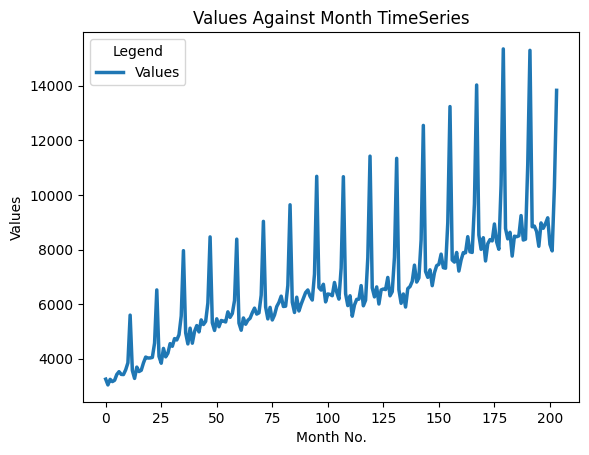

In [18]:
sns.lineplot(data=Data12[['Month', 'Values']],linewidth=2.5, palette="tab10")

# plot two columns using Seaborn with labels and legend
#sns.lineplot(data=df[['x', 'y1', 'y2']], linewidth=2.5, palette="tab10")
plt.xlabel('Month No.')
plt.ylabel('Values')
plt.title('Values Against Month TimeSeries')
plt.legend(title='Legend', loc='upper left')

In [19]:
## Visualizing minute details of data pattern

In [20]:
Data3 = Data12.iloc[len(Data12)-40:len(Data12)]

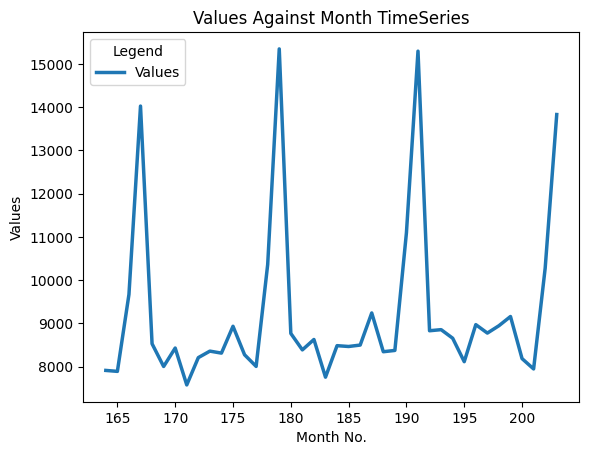

In [21]:
sns.lineplot(data=Data3[['Month', 'Values']],linewidth=2.5, palette="tab10")

# plot two columns using Seaborn with labels and legend
#sns.lineplot(data=df[['x', 'y1', 'y2']], linewidth=2.5, palette="tab10")
plt.xlabel('Month No.')
plt.ylabel('Values')
plt.title('Values Against Month TimeSeries')
plt.legend(title='Legend', loc='upper left')

# Data Scaling

In [22]:
## Since data has only one feature .. no scaling is required in the data

# Preparing the data

In [23]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = [], []
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return numpy.array(X),numpy.array(y)

In [24]:
look_back = 5
import numpy
trainX1, trainY1 = split_sequence(C, look_back)
testX1, testY1 = split_sequence(D, look_back)

In [26]:
trainX1.shape

(168, 5)

# Shaping the input data

In [29]:
n_features = 1

In [30]:
trainX = trainX1.reshape((trainX1.shape[0], trainX1.shape[1],n_features))
testX = testX1.reshape((testX1.shape[0], testX1.shape[1],n_features))

# Training The Vanilla LSTM Model

In [34]:
n_features = 1

In [35]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50,activation='relu', input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX1, trainY1, epochs=50, batch_size=50, verbose=2)

Epoch 1/50
4/4 - 4s - loss: 47429544.0000 - 4s/epoch - 1s/step
Epoch 2/50
4/4 - 0s - loss: 45311860.0000 - 31ms/epoch - 8ms/step
Epoch 3/50
4/4 - 0s - loss: 43203736.0000 - 32ms/epoch - 8ms/step
Epoch 4/50
4/4 - 0s - loss: 40815284.0000 - 36ms/epoch - 9ms/step
Epoch 5/50
4/4 - 0s - loss: 37846944.0000 - 60ms/epoch - 15ms/step
Epoch 6/50
4/4 - 0s - loss: 35145284.0000 - 40ms/epoch - 10ms/step
Epoch 7/50
4/4 - 0s - loss: 32550012.0000 - 70ms/epoch - 18ms/step
Epoch 8/50
4/4 - 0s - loss: 29764526.0000 - 33ms/epoch - 8ms/step
Epoch 9/50
4/4 - 0s - loss: 26972260.0000 - 43ms/epoch - 11ms/step
Epoch 10/50
4/4 - 0s - loss: 24206192.0000 - 33ms/epoch - 8ms/step
Epoch 11/50
4/4 - 0s - loss: 21475666.0000 - 31ms/epoch - 8ms/step
Epoch 12/50
4/4 - 0s - loss: 17557680.0000 - 31ms/epoch - 8ms/step
Epoch 13/50
4/4 - 0s - loss: 13634036.0000 - 32ms/epoch - 8ms/step
Epoch 14/50
4/4 - 0s - loss: 9779697.0000 - 35ms/epoch - 9ms/step
Epoch 15/50
4/4 - 0s - loss: 7186496.0000 - 35ms/epoch - 9ms/step
Epoch

# Predictions

In [36]:
n_steps = look_back

In [37]:
# demonstrate prediction
x_input = array([6529, 8529, 10529,11529,5529])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[5501.2573]]


In [38]:
trainPredict = model.predict(trainX1)
testPredict = model.predict(testX1)

1/1 [==============================] - 0s 39ms/step


In [39]:
from sklearn.metrics import mean_squared_error

# Accuracy Metrics

In [40]:
# make predictions
import math
trainPredict = model.predict(trainX1)
testPredict = model.predict(testX1)
trainScore = math.sqrt(mean_squared_error(trainY1, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY1, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 45ms/step
Train Score: 1152.89 RMSE
Test Score: 1884.00 RMSE


In [41]:
## Finding Mape

In [42]:
import numpy as np

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [43]:
mape_train = mape(trainY1, trainPredict)
mape_train

29.546938875345813

In [44]:
mape_test = mape(testY1, testPredict)
mape_test

13.135832250185747

In [45]:
Accuracy_train  = 100 - mape_train
Accuracy_test = 100 - mape_test
acc_train = round(Accuracy_train, 2)
acc_test = round(Accuracy_test, 2)


In [46]:
print("Train Accuracy of the model :",acc_train , "%")

Train Accuracy of the model : 70.45 %


In [47]:
print("Test Accuracy of the model :",acc_test , "%")

Test Accuracy of the model : 86.86 %


In [48]:
## Predicting Next 12 Values

# Predicting Next 12 values


In [49]:
E = np.append(C,D)

In [50]:
F = E[len(E)-5:]

In [51]:
G = F.astype(int)

In [52]:
# First Prediction
x_input = array([9161, 8188, 7949,10277,13828])
x_input = G.reshape((1, n_steps, n_features))
yhat1 = model.predict(x_input, verbose=0)
print(yhat1)

[[9410.117]]


In [53]:
F = np.append(F,yhat1)
G = F.astype(int)

In [54]:
for i in range(11):
  x_input = G[len(G)-5:len(G)].reshape((1, n_steps, n_features))
  yhat1 = model.predict(x_input, verbose=0)
  #print(yhat1)
  F = np.append(F,yhat1)
  G = F.astype(int)

In [55]:
F

array([ 9161.        ,  8188.        ,  7949.        , 10277.        ,
       13828.        ,  9410.1171875 ,  9417.50878906,  8074.09228516,
        8337.1875    ,  8298.80566406,  9212.58691406,  9211.83984375,
        9494.54199219,  9590.80664062, 10114.82617188, 10515.19824219,
       10791.62402344])

# Below are the next 12 predictions

In [56]:
out = F[len(F)-12:len(F)]

In [57]:
out

array([ 9410.1171875 ,  9417.50878906,  8074.09228516,  8337.1875    ,
        8298.80566406,  9212.58691406,  9211.83984375,  9494.54199219,
        9590.80664062, 10114.82617188, 10515.19824219, 10791.62402344])

In [58]:
Output_df = pd.DataFrame(out, columns=['Predictions'])

In [59]:
Output_df.to_csv("LSTM_Forecasting_Predictions.csv")

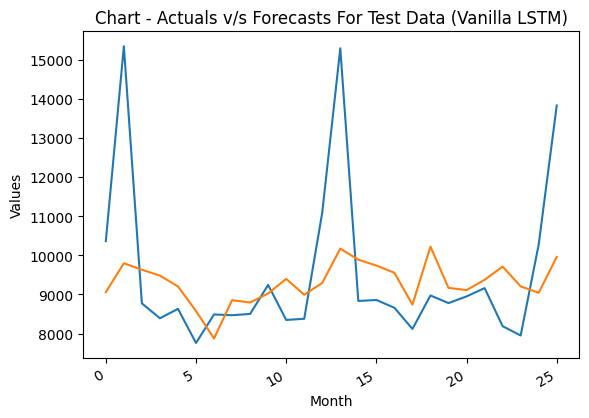

In [60]:
import pandas as pd
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.title("Chart - Actuals v/s Forecasts For Test Data (Vanilla LSTM)")
plt.xlabel("Month")
plt.ylabel("Values")


plt.plot(testY1)
plt.plot(testPredict)

plt.gcf().autofmt_xdate()

plt.show()

# Stacked LSTM

In [61]:
# define Stacked LSTM model
model_s = Sequential()
model_s.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_s.add(LSTM(50, activation='relu'))
model_s.add(Dense(1))
model_s.compile(optimizer='adam', loss='mse')
# fit model
model_s.fit(trainX1, trainY1, epochs=200, verbose=0)


In [62]:
# demonstrate prediction from Stacked LSTM Model
x_input = array([6529, 8529, 10529,11529,5529])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_s.predict(x_input, verbose=0)
print(yhat)

[[7252.7847]]


In [63]:
# make predictions
import math
trainPredict_s = model_s.predict(trainX1)
testPredict_s = model_s.predict(testX1)
trainScore = math.sqrt(mean_squared_error(trainY1, trainPredict_s))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY1, testPredict_s))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 22ms/step
Train Score: 1202.68 RMSE
Test Score: 2085.87 RMSE


In [64]:
mape(trainY1, trainPredict_s)

28.29459207895852

In [65]:
mape(testY1,testPredict_s)

12.045656873909397

In [66]:
mape_train = mape(trainY1, trainPredict_s)
mape_train

28.29459207895852

In [67]:
mape_test = mape(testY1, testPredict_s)
mape_test

12.045656873909397

In [68]:
Accuracy_train  = 100 - mape_train
Accuracy_test = 100 - mape_test
acc_train = round(Accuracy_train, 2)
acc_test = round(Accuracy_test, 2)

In [69]:
print("Train Accuracy of the model :",acc_train , "%")

Train Accuracy of the model : 71.71 %


In [70]:
print("Test Accuracy of the model :",acc_test , "%")

Test Accuracy of the model : 87.95 %


# We are getting slightly higher accuracy with Stacked LSTM in comparison with Vanilla LSTM

In [71]:
## First Prediction with Stacked LSTM

In [72]:
E1 = np.append(C,D)

In [73]:
F = E1[len(E1)-5:]

In [74]:
F1 = F

In [75]:
G1 = F1.astype(int)

In [77]:
x_input = array([9161, 8188, 7949,10277,13828])
x_input = G1.reshape((1, n_steps, n_features))
yhat1 = model_s.predict(x_input, verbose=0)
print(yhat1)

[[10323.942]]


In [78]:
F1 = np.append(F1,yhat1)
G1 = F1.astype(int)

In [79]:
for i in range(11):
  x_input = G1[len(G1)-5:len(G1)].reshape((1, n_steps, n_features))
  yhat1 = model_s.predict(x_input, verbose=0)
  #print(yhat1)
  F1 = np.append(F1,yhat1)
  G1 = F1.astype(int)

In [80]:
F1

array([ 9161.        ,  8188.        ,  7949.        , 10277.        ,
       13828.        , 10323.94238281,  9363.28515625,  9377.61425781,
       10133.40136719, 10218.00195312, 10377.26855469, 10179.86914062,
       10289.79980469, 10565.12597656, 10782.36230469, 10886.86230469,
       10904.31835938])

In [81]:
out_s = F1[len(F)-12:len(F1)]

In [82]:
out_s

array([10377.26855469, 10179.86914062, 10289.79980469, 10565.12597656,
       10782.36230469, 10886.86230469, 10904.31835938])

In [83]:
out_s_df = pd.DataFrame(out_s, columns=['Predictions'])

In [84]:
out_s_df.to_csv("Stacked_LSTM_Forecasting_12Forecasts.csv")

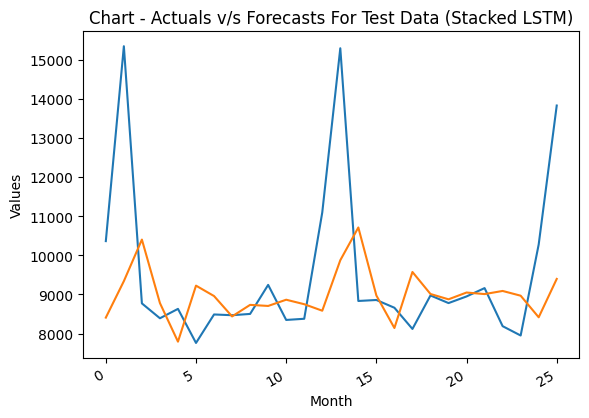

In [85]:
import pandas as pd
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.title("Chart - Actuals v/s Forecasts For Test Data (Stacked LSTM)")
plt.xlabel("Month")
plt.ylabel("Values")


plt.plot(testY1)
plt.plot(testPredict_s)

plt.gcf().autofmt_xdate()

plt.show()




# Accuracy is slightly higher with Stacked LSTM in comparison with Vanilla LSTM. Test Accuracy with Stacked LSTM is ~88% and with Vanilla LSTM is ~87%.